In [2]:
''' 
Run this notebook to generate samples of the priors in Fig 1. of Gilles, Singer, 2022
'''

import generate_synthetic_data as gsm
from plotting_utils import plot_samples_on_same_scale
import os
import sample_from_prior as sfp

save_directory = os.getcwd() + "/results/"
save_to_file = False

# Discretiztion parameters
n_images_to_plot = 1
grid_size = 51 # The paper uses grid_size = 151 in fig.1 , but it is very slow as it takes a dense cholesky of a (151^2)x(151^2) matrix.
img_size = 80.5
voxel_size = img_size / grid_size

# Define the parameters of the bag of atom distribution
radius = 40 # in anstroms
N_atoms = 8871 
atom_shape_fn = gsm.get_atom_shape_fn('C')
mol_shape_fn = lambda x: sfp.ball_g_hat(x, radius)

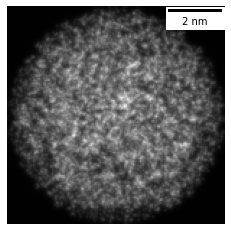

<Figure size 432x288 with 0 Axes>

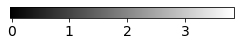

In [3]:
prior_name = "bag"
images = [sfp.generate_spherical_bag_of_atom_projection(grid_size, radius, voxel_size, N_atoms, atom_shape_fn) for _ in range(n_images_to_plot)]
plot_samples_on_same_scale(images, save_directory + prior_name, voxel_size, save_to_file)

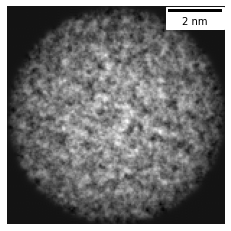

<Figure size 432x288 with 0 Axes>

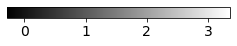

In [4]:
prior_name = "wilson"
mean_real, mean_imag, real_cov_chol, imag_cov_chol = sfp.get_wilson_mean_cov_chol(grid_size, voxel_size, N_atoms, mol_shape_fn, atom_shape_fn)
images = [sfp.generate_wilson_projection(grid_size, voxel_size, N_atoms, real_cov_chol, imag_cov_chol, mean_real, mean_imag) for _ in range(n_images_to_plot)]
plot_samples_on_same_scale(images, save_directory + prior_name, voxel_size, save_to_file)

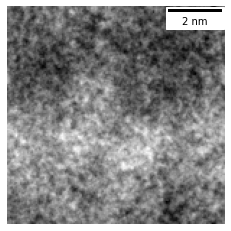

<Figure size 432x288 with 0 Axes>

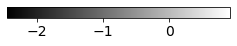

In [5]:
prior_name = "diagonal"
mean, cov_chol = sfp.compute_diagonal_prior_mean_cov_chol(grid_size, voxel_size, N_atoms, mol_shape_fn, atom_shape_fn)
images = [sfp.generate_diagonal_projection(grid_size, voxel_size, N_atoms, cov_chol = cov_chol, mean = mean) for _ in range(n_images_to_plot)]
plot_samples_on_same_scale(images, save_directory + prior_name, voxel_size, save_to_file)

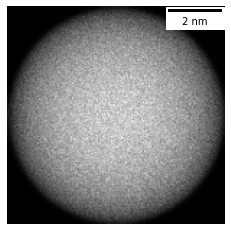

<Figure size 432x288 with 0 Axes>

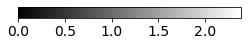

In [6]:
prior_name = "SIE"
mean = sfp.get_sie_mean(grid_size, voxel_size, N_atoms, mol_shape_fn, atom_shape_fn)
images = [sfp.generate_sie_projection(grid_size, voxel_size, N_atoms, mean = mean) for _ in range(n_images_to_plot)]
plot_samples_on_same_scale(images, save_directory + prior_name, voxel_size, save_to_file)